# Project US Speech Analysis

## Part 3: Feature engineering and visualization

We will be getting simple metrics such as:
1. speech length
2. number of sentences in speech

In this notebook, you will do the following:
1. Import pandas and data vizualization libraries
2. Derive metrics around the speeches
3. Plot the metrics for comparison between the two

In [1]:
# Step 1: Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Read your CSV from Part II
df = pd.read_csv('Speech_data.csv')
df

,filename,name,year,speech
0,obama2010.txt,Obama,2010,"Madam Speaker, Vice President Biden, members o..."
1,obama2011.txt,Obama,2011,"Mr. Speaker, Mr. Vice President, members of Co..."
2,obama2012.txt,Obama,2012,"Mr. Speaker, Mr. Vice President, members of Co..."
3,obama2013.txt,Obama,2013,"Mr. Speaker, Mr. Vice President, members of Co..."
4,obama2014.txt,Obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co..."
5,obama2015.txt,Obama,2015,"Mr. Speaker, Mr. Vice President, Members of Co..."
6,obama2016.txt,Obama,2016,"Mr. Speaker, Mr. Vice President, Members of Co..."
7,trump2018.txt,Trump,2018,"Mr. Speaker, Mr. Vice President, Members of Co..."
8,trump2019.txt,Trump,2019,"Madam Speaker, Mr. Vice President, Members of ..."
9,trump2020.txt,Trump,2020,Thank you very much. Thank you. Thank you ve...


## Engineer features from speech
We'll start deriving features from the speeches.

1. Number of characters
2. Number of sentences
3. Average number of characters
4. Readability scores

In [3]:
# Step 3: Get the number of characters in your speech
df['len_speech'] = df['speech'].str.len()

In [4]:
df

,filename,name,year,speech,len_speech
0,obama2010.txt,Obama,2010,"Madam Speaker, Vice President Biden, members o...",43698
1,obama2011.txt,Obama,2011,"Mr. Speaker, Mr. Vice President, members of Co...",41023
2,obama2012.txt,Obama,2012,"Mr. Speaker, Mr. Vice President, members of Co...",42203
3,obama2013.txt,Obama,2013,"Mr. Speaker, Mr. Vice President, members of Co...",41201
4,obama2014.txt,Obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",40009
5,obama2015.txt,Obama,2015,"Mr. Speaker, Mr. Vice President, Members of Co...",40268
6,obama2016.txt,Obama,2016,"Mr. Speaker, Mr. Vice President, Members of Co...",31167
7,trump2018.txt,Trump,2018,"Mr. Speaker, Mr. Vice President, Members of Co...",30457
8,trump2019.txt,Trump,2019,"Madam Speaker, Mr. Vice President, Members of ...",30945
9,trump2020.txt,Trump,2020,Thank you very much. Thank you. Thank you ve...,39648


### Step 4: Replace "!" and "?" with "." in speech
We'll be getting the number of sentences in the speeches, so let's replace our exclamation and question marks with a full stop so that we can split the sentences cleanly later on.

In [5]:
# Step 4: Replace ?/! with .
df['speech'] = df['speech'].str.replace('!', '.')
df['speech'] = df['speech'].str.replace('?', '.')

C:\Users\hslim\AppData\Local\Temp/ipykernel_26980/174059563.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['speech'] = df['speech'].str.replace('?', '.')


### Step 5: Split the speech and get the number of sentences
In this step, you will need to do two things:
1. Split the speech into a list of sentences by splitting based on "."
2. Get the resulting length of the list

In [6]:
# Step 5: Get column containing split speech and length of the lists
df['sentences'] = df['speech'].str.split('.').tolist()

In [7]:
df['num_sentences'] = df['sentences'].str.len()

In [8]:
df

,filename,name,year,speech,len_speech,sentences,num_sentences
0,obama2010.txt,Obama,2010,"Madam Speaker, Vice President Biden, members o...",43698,"[Madam Speaker, Vice President Biden, members ...",562
1,obama2011.txt,Obama,2011,"Mr. Speaker, Mr. Vice President, members of Co...",41023,"[Mr, Speaker, Mr, Vice President, members of...",500
2,obama2012.txt,Obama,2012,"Mr. Speaker, Mr. Vice President, members of Co...",42203,"[Mr, Speaker, Mr, Vice President, members of...",518
3,obama2013.txt,Obama,2013,"Mr. Speaker, Mr. Vice President, members of Co...",41201,"[Mr, Speaker, Mr, Vice President, members of...",455
4,obama2014.txt,Obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",40009,"[Mr, Speaker, Mr, Vice President, Members of...",352
5,obama2015.txt,Obama,2015,"Mr. Speaker, Mr. Vice President, Members of Co...",40268,"[Mr, Speaker, Mr, Vice President, Members of...",466
6,obama2016.txt,Obama,2016,"Mr. Speaker, Mr. Vice President, Members of Co...",31167,"[Mr, Speaker, Mr, Vice President, Members of...",305
7,trump2018.txt,Trump,2018,"Mr. Speaker, Mr. Vice President, Members of Co...",30457,"[Mr, Speaker, Mr, Vice President, Members of...",323
8,trump2019.txt,Trump,2019,"Madam Speaker, Mr. Vice President, Members of ...",30945,"[Madam Speaker, Mr, Vice President, Members o...",298
9,trump2020.txt,Trump,2020,Thank you very much. Thank you. Thank you ve...,39648,"[Thank you very much, Thank you, Thank you...",557


### Step 6: Get the average sentence length
It's not enough that we get the absolute length of the speeches, and the number of sentences. 

We should also create a column named 'average_sen_length' that tells you what the average number of characters there are in a sentence. 

In [9]:
# Step 6: Create a column containing average sentence length
df['average_sen_length'] = df['len_speech'] / df['num_sentences']
df

,filename,name,year,speech,len_speech,sentences,num_sentences,average_sen_length
0,obama2010.txt,Obama,2010,"Madam Speaker, Vice President Biden, members o...",43698,"[Madam Speaker, Vice President Biden, members ...",562,77.754448
1,obama2011.txt,Obama,2011,"Mr. Speaker, Mr. Vice President, members of Co...",41023,"[Mr, Speaker, Mr, Vice President, members of...",500,82.046000
2,obama2012.txt,Obama,2012,"Mr. Speaker, Mr. Vice President, members of Co...",42203,"[Mr, Speaker, Mr, Vice President, members of...",518,81.472973
3,obama2013.txt,Obama,2013,"Mr. Speaker, Mr. Vice President, members of Co...",41201,"[Mr, Speaker, Mr, Vice President, members of...",455,90.551648
4,obama2014.txt,Obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",40009,"[Mr, Speaker, Mr, Vice President, Members of...",352,113.661932
5,obama2015.txt,Obama,2015,"Mr. Speaker, Mr. Vice President, Members of Co...",40268,"[Mr, Speaker, Mr, Vice President, Members of...",466,86.412017
6,obama2016.txt,Obama,2016,"Mr. Speaker, Mr. Vice President, Members of Co...",31167,"[Mr, Speaker, Mr, Vice President, Members of...",305,102.186885
7,trump2018.txt,Trump,2018,"Mr. Speaker, Mr. Vice President, Members of Co...",30457,"[Mr, Speaker, Mr, Vice President, Members of...",323,94.294118
8,trump2019.txt,Trump,2019,"Madam Speaker, Mr. Vice President, Members of ...",30945,"[Madam Speaker, Mr, Vice President, Members o...",298,103.842282
9,trump2020.txt,Trump,2020,Thank you very much. Thank you. Thank you ve...,39648,"[Thank you very much, Thank you, Thank you...",557,71.181329


### Step 7: Import readability
We will now get some readability scores for the speeches. 

Why so? Readability indicates how accessible the ideas in the speeches are, and accessibility helps with connecting with the audience.

That said, since these are speech transcripts, they're not exactly meant for reading. However, it's still a good idea to see if we can analyze the readability of their speeches.

There are a lot of readability scores, but we will focus on two scores:
1. SMOG
2. Flesch reading ease score

In [10]:
# Step 7: Import readability
import readability

### Step 8: Add SMOGIndex and FleschReadingEase into your DataFrame
As mentioned, we will be using these two commonly used scores in readability tests.

Loop through the values in the 'speech' column and get the scores for your new column, named 'SMOG_index' and 'Flesch_score'.

In [11]:
# Step 8: Add SMOGIndex and FleschReadingEase
SMOG_index = []
Flesch_score = []
for speech in df['speech']:
    results = readability.getmeasures(speech)
    SMOG_index.append(results['readability grades']['SMOGIndex'])
    Flesch_score.append(results['readability grades']['FleschReadingEase'])
df['SMOG_index'] = SMOG_index
df['Flesch_score'] = Flesch_score
df

,filename,name,year,speech,len_speech,sentences,num_sentences,average_sen_length,SMOG_index,Flesch_score
0,obama2010.txt,Obama,2010,"Madam Speaker, Vice President Biden, members o...",43698,"[Madam Speaker, Vice President Biden, members ...",562,77.754448,17.826429,24.720575
1,obama2011.txt,Obama,2011,"Mr. Speaker, Mr. Vice President, members of Co...",41023,"[Mr, Speaker, Mr, Vice President, members of...",500,82.046000,16.543303,32.322806
2,obama2012.txt,Obama,2012,"Mr. Speaker, Mr. Vice President, members of Co...",42203,"[Mr, Speaker, Mr, Vice President, members of...",518,81.472973,17.344065,26.228014
3,obama2013.txt,Obama,2013,"Mr. Speaker, Mr. Vice President, members of Co...",41201,"[Mr, Speaker, Mr, Vice President, members of...",455,90.551648,14.187551,52.062427
4,obama2014.txt,Obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",40009,"[Mr, Speaker, Mr, Vice President, Members of...",352,113.661932,19.064501,9.227649
5,obama2015.txt,Obama,2015,"Mr. Speaker, Mr. Vice President, Members of Co...",40268,"[Mr, Speaker, Mr, Vice President, Members of...",466,86.412017,13.518314,56.194377
6,obama2016.txt,Obama,2016,"Mr. Speaker, Mr. Vice President, Members of Co...",31167,"[Mr, Speaker, Mr, Vice President, Members of...",305,102.186885,17.441406,25.062509
7,trump2018.txt,Trump,2018,"Mr. Speaker, Mr. Vice President, Members of Co...",30457,"[Mr, Speaker, Mr, Vice President, Members of...",323,94.294118,13.843611,51.034490
8,trump2019.txt,Trump,2019,"Madam Speaker, Mr. Vice President, Members of ...",30945,"[Madam Speaker, Mr, Vice President, Members o...",298,103.842282,14.799100,44.106260
9,trump2020.txt,Trump,2020,Thank you very much. Thank you. Thank you ve...,39648,"[Thank you very much, Thank you, Thank you...",557,71.181329,16.381695,33.439536


## Visualizing the speech metrics
Okay, we have successfully extract all the information that we need for now. 

Next up, we will now visualize them for comparison between Obama and Trump. Most of the analyses will be done using boxplot, and we recommend seaborn as the library of choice here. 

### Step 9: Analyze len_speech with a boxplot
We'll first compare len_speech with a boxplot. 

c:\users\hslim\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='name', ylabel='len_speech'>

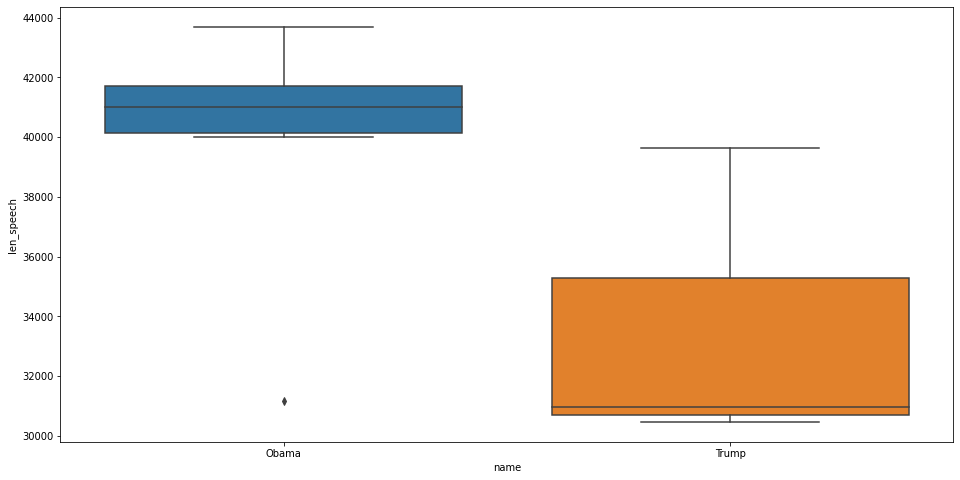

In [12]:
# Step 9: Plot a boxplot for len_speech
plt.figure(figsize = (16,8))
sns.boxplot(df['name'], df['len_speech'])

### Step 10: Analyze num_sentences with a boxplot
Next, we'll first compare num_sentences with a boxplot. 

c:\users\hslim\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='name', ylabel='num_sentences'>

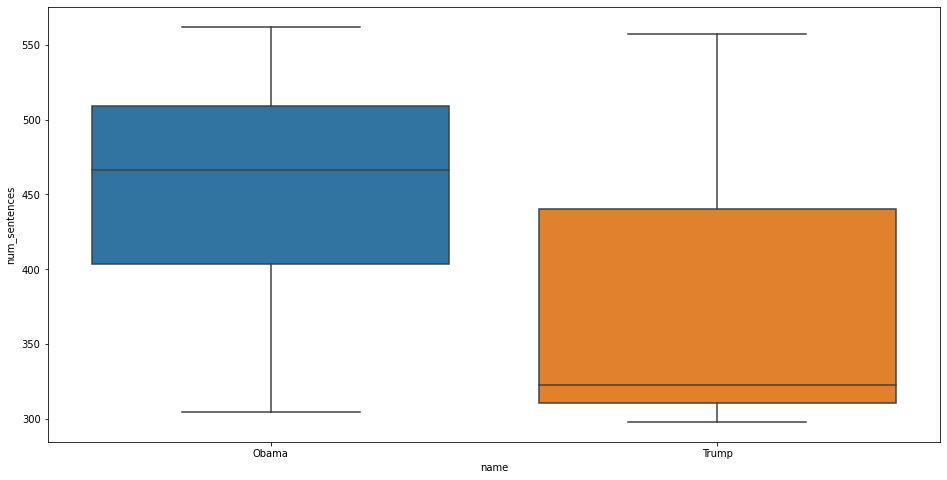

In [13]:
# Step 10: Analyze num_sentences with a boxplot
plt.figure(figsize = (16,8))
sns.boxplot(df['name'], df['num_sentences'])

### Step 11: Analyze average_sen_length with a boxplot
So far, it seems that Trump's speeches are shorter and there are fewer sentences.

However, plotting the absolute speech length and number of sentences is one half of a data story - you'll still need to look at the averages/ratio of length to number of sentences.

Plot average_sen_length as well.

c:\users\hslim\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='name', ylabel='average_sen_length'>

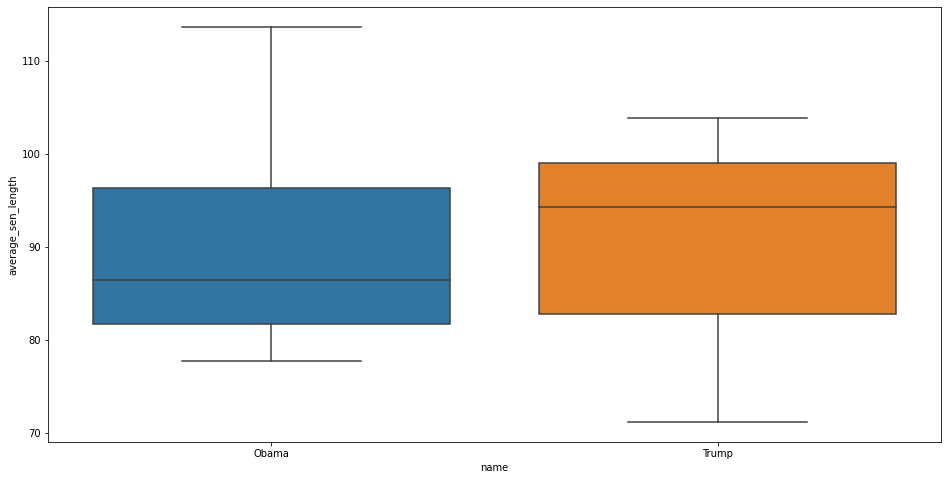

In [14]:
# Step 11: Plot average_sen_length with a boxplot
plt.figure(figsize = (16,8))
sns.boxplot(df['name'], df['average_sen_length'])

In [15]:
# Step 12: Print the average_sen_length
df_obama = df[df['name'] == 'Obama']
df_obama['average_sen_length'].mean()

90.58370056495188

In [16]:
df_trump = df[df['name'] == 'Trump']
df_trump['average_sen_length'].mean()

89.77257602401147

### Step 13: Analyze SMOG_index with a boxplot
Next up, let's compare the readability of the two individuals' speeches.

We'll start with a boxplot for SMOG_index.

P.S. The higher the SMOG score, the harder it is to read

c:\users\hslim\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='name', ylabel='SMOG_index'>

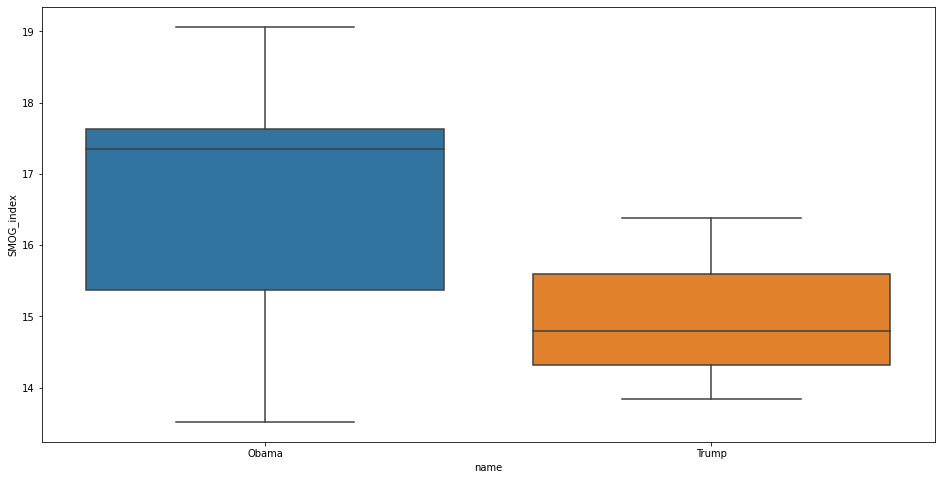

In [17]:
# Step 13: Plot SMOG_index with a boxplot
plt.figure(figsize = (16,8))
sns.boxplot(df['name'], df['SMOG_index'])

### Step 14: Analyze Flesch_score with a boxplot
Once you clear the SMOG, next up is Flesch_score. 

Same thing, plot a boxplot for Flesch_score.

P.S. The higher the Flesch Reading Ease score, the easier it is to read.

c:\users\hslim\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='name', ylabel='Flesch_score'>

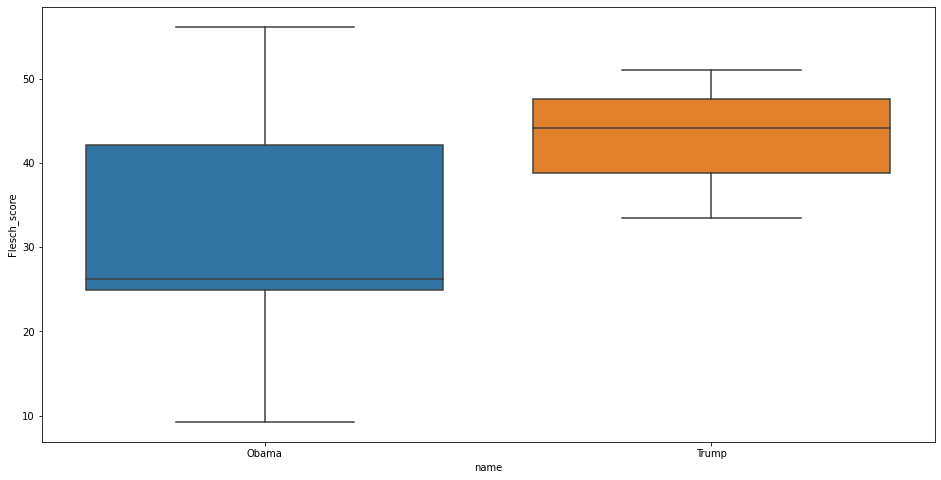

In [18]:
# Step 14: Plot average_sen_length with a boxplot
plt.figure(figsize = (16,8))
sns.boxplot(df['name'], df['Flesch_score'])

Now that you've plotted the barplots for SMOG and Flesch Reading Ease scores, what can you say about their speeches?

Hopefully, you'll come to the same conclusion as us - Trump's speeches are generally easier to read whereas Obama's speeches are harder to read. 

Interpret that how you will. 

### Step 15: Export the expanded DataFrame as a CSV
Now that we're done plotting, we will be exporting the DataFrame into a CSV for use in other Parts.

In [19]:
# Step 15: Export the DataFrame to CSV
df.to_csv('Speech_data_extended.csv', index = None)